# Employee Attrition Data Clean

This notebook is dedicated to cleaning and merging the 5 .csv files containing over 52 features on the 4,400 employees.  The result is one master dataFrame, which I exported as a .csv file to use in other notebooks.

## The Process<span id="0"></span>


* #### Import & Cleaning
    *   [**Import:**](#1)  Imported the .CSV files as a Pandas DataFrame.
    *   [**Merged Data:**](#2)  Where necessary, conducted some basic feature engineering, and merged the dataframes together into a master df.
    *   [***Data Types:***](#3)  Checked for data types and removed any unnecessary features that contained string data.
    *   [***Null Values:***](#4)  Identified Null values and either removed them or transformed them into an appropriate value.
    *   [***Categorical Data:***](#5)  Identified categorical data and either dropped it or transformed it into numerical dummy variables.
    *   [***Outliers:***](#6)  Removed the top and bottom 2.5% of the dataset (the extreme outliers), which created unnecessary variance.  



In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
sns.set(style="white")
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

/home/corey/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


***Remove***: EmployeeCount & Over18.  These columns contain the same value for every employee and therefore aren't relevant to this analysis.

***Binary***: Attrition & Gender.  Need to make these columns numerical to conduct calculations.

   *  Attrition: 0 = No, 1 = Yes
   *  Gender: 0 = Female, 1 = Male

***Categorical Data***:  BusinessTravel, Department, EducationField, JobRole, MaritalStatus,

In [2]:
general = pd.read_csv('data/general_data.csv')

In [6]:
pd.set_option('display.max_columns', None)
general.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4


In [7]:
unecessary = ['EmployeeCount', 'Over18']

In [8]:
general.drop(['EmployeeCount', 'Over18'], axis=1, inplace=True)

In [9]:
general.groupby(['MaritalStatus']).count()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
MaritalStatus,,,,,,,,,,,,,,,,,,,,,
Divorced,981,981,981,981,981,981,981,981,981,981,981,981,973,981,981,981,978,981,981,981,981
Married,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2012,2019,2019,2019,2014,2019,2019,2019,2019
Single,1410,1410,1410,1410,1410,1410,1410,1410,1410,1410,1410,1410,1406,1410,1410,1410,1409,1410,1410,1410,1410


In [11]:
binary = ['Attrition', 'Gender']
general['Attrition'] = pd.get_dummies(general['Attrition'],drop_first=True,dtype=float)
general['Gender'] = pd.get_dummies(general['Gender'],drop_first=True,dtype=float)

In [122]:
general.head(105)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0.0,Travel_Rarely,Sales,6,2,Life Sciences,1,0.0,1,Healthcare Representative,Married,131160,1.0,11,8,0,1.0,6,1,0,0
1,31,1.0,Travel_Frequently,Research & Development,10,1,Life Sciences,2,0.0,1,Research Scientist,Single,41890,0.0,23,8,1,6.0,3,5,1,4
2,32,0.0,Travel_Frequently,Research & Development,17,4,Other,3,1.0,4,Sales Executive,Married,193280,1.0,15,8,3,5.0,2,5,0,3
3,38,0.0,Non-Travel,Research & Development,2,5,Life Sciences,4,1.0,3,Human Resources,Married,83210,3.0,11,8,3,13.0,5,8,7,5
4,32,0.0,Travel_Rarely,Research & Development,10,1,Medical,5,1.0,1,Sales Executive,Single,23420,4.0,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,36,0.0,Non-Travel,Human Resources,28,3,Human Resources,101,1.0,2,Laboratory Technician,Single,24320,4.0,22,8,0,7.0,4,1,0,0
101,36,0.0,Travel_Frequently,Research & Development,6,3,Life Sciences,102,0.0,2,Research Scientist,Married,47710,4.0,13,8,1,16.0,2,13,1,12
102,57,0.0,Travel_Rarely,Research & Development,21,4,Life Sciences,103,1.0,5,Research Scientist,Married,191610,2.0,18,8,0,15.0,2,3,1,2
103,40,0.0,Travel_Rarely,Research & Development,8,3,Other,104,1.0,2,Sales Executive,Married,50870,3.0,14,8,1,10.0,3,7,1,7


# Fill Null Values with Zeros

I identified 19 null values in the Number of Companies Worked column and filled them with zeros.

In [12]:
general.fillna(0.0, inplace=True)

In [13]:
general.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [58]:
general.dtypes

Age                          int64
Attrition                  float64
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeID                   int64
Gender                     float64
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

# Isolate the Education Field Column for Analysis

In [14]:
ed_field = general.loc[:,('Attrition', 'EducationField')]
ed_field.head(50)

,Attrition,EducationField
0,0.0,Life Sciences
1,1.0,Life Sciences
2,0.0,Other
3,0.0,Life Sciences
4,0.0,Medical
5,0.0,Life Sciences
6,1.0,Medical
7,0.0,Life Sciences
8,0.0,Life Sciences
9,0.0,Medical


In [89]:
ed_field['EducationField'] = ed_field['EducationField'].astype('category')

In [90]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
ed_field['EducationField'] = lb_make.fit_transform(ed_field['EducationField'])

In [112]:
ed_field['count'] = np.ones((range(len(ed_field['EducationField']),0)))

In [116]:
ed_field.groupby(['Attrition', 'EducationField']).count()

count
Attrition EducationField       
0.0       0                  48
          1                1515
          2                 402
          3                1167
          4                 216
          5                 351
1.0       0                  33
          1                 303
          2                  75
          3                 225
          4                  30
          5                  45

In [125]:
ed_field_1 = ed_field[ed_field['Attrition'] == 1]

In [126]:
ed_field_1.groupby(['Attrition', 'EducationField']).count()

count
Attrition EducationField       
1.0       0                  33
          1                 303
          2                  75
          3                 225
          4                  30
          5                  45

(array([ 33., 303.,  75., 225.,  30.,  45.]),
 array([0.        , 0.83333333, 1.66666667, 2.5       , 3.33333333,
        4.16666667, 5.        ]),
 <a list of 6 Patch objects>)

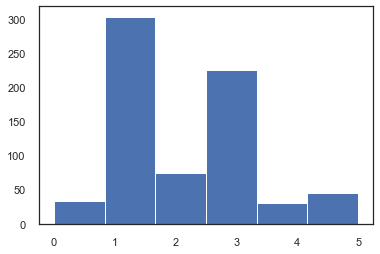

In [151]:
x = ed_field_1['EducationField']
plt.hist(x, bins=6)

* Human Resources: 0
* ***Life Sciences***: 1
* Marketing: 2
* ***Medical***: 3
* Other: 4
* Technical Degree: 5

# Isolate the Department Column for Analysis

In [131]:
department = general.loc[:,('Attrition', 'Department')]
department.head()

,Attrition,Department
0,0.0,Sales
1,1.0,Research & Development
2,0.0,Research & Development
3,0.0,Research & Development
4,0.0,Research & Development


In [137]:
set(department['Department'].values)

{'Human Resources', 'Research & Development', 'Sales'}

In [138]:
department['Department'] = department['Department'].astype('category')

In [139]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
department['Department'] = lb_make.fit_transform(department['Department'])

In [140]:
department['count'] = np.ones((range(len(department['Department']),0)))

In [152]:
department.head()

,Attrition,Department,count
0,0.0,2,1.0
1,1.0,1,1.0
2,0.0,1,1.0
3,0.0,1,1.0
4,0.0,1,1.0


In [141]:
department_1 = department[department['Attrition'] == 1]

In [142]:
department_1.groupby(['Attrition', 'Department']).count()

count
Attrition Department       
1.0       0              57
          1             453
          2             201

(array([ 57.,   0., 453.,   0., 201.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. ]),
 <a list of 5 Patch objects>)

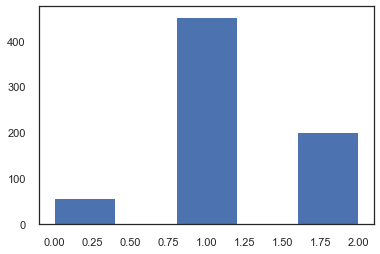

In [145]:
x = department_1['Department']
plt.hist(x, bins=5)

*  Human Resources: 0
*  ***Research & Development***: 1
*  Sales: 2

In [165]:
def categorical(df, target, category):
    new_df = df.loc[:,(target, category)]
    values = set(new_df[category].values)
    print(values)
    print(new_df.head(50))
    new_df[category] = new_df[category].astype('category')
    lb_make = LabelEncoder()
    new_df[category] = lb_make.fit_transform(new_df[category])
    print(new_df.head(50))
    new_df['count'] = np.ones((range(len(new_df[category]),0)))
    new_df_1 = new_df[new_df[target] == 1]
    new_df_1.groupby([target, category]).count()
    x = new_df_1[category]
    return new_df_1.groupby([target, category]).count(), plt.hist(x, bins=len(values))

{'Travel_Rarely', 'Non-Travel', 'Travel_Frequently'}
    Attrition     BusinessTravel
0         0.0      Travel_Rarely
1         1.0  Travel_Frequently
2         0.0  Travel_Frequently
3         0.0         Non-Travel
4         0.0      Travel_Rarely
5         0.0      Travel_Rarely
6         1.0      Travel_Rarely
7         0.0      Travel_Rarely
8         0.0      Travel_Rarely
9         0.0         Non-Travel
10        0.0      Travel_Rarely
11        0.0      Travel_Rarely
12        0.0      Travel_Rarely
13        1.0         Non-Travel
14        0.0      Travel_Rarely
15        0.0      Travel_Rarely
16        0.0      Travel_Rarely
17        0.0         Non-Travel
18        0.0      Travel_Rarely
19        0.0      Travel_Rarely
20        0.0  Travel_Frequently
21        0.0      Travel_Rarely
22        0.0      Travel_Rarely
23        0.0      Travel_Rarely
24        0.0  Travel_Frequently
25        0.0      Travel_Rarely
26        0.0  Travel_Frequently
27        0.0      Trav

(                          count
 Attrition BusinessTravel       
 1.0       0                  36
           1                 207
           2                 468,
 (array([ 36., 207., 468.]),
  array([0.        , 0.66666667, 1.33333333, 2.        ]),
  <a list of 3 Patch objects>))

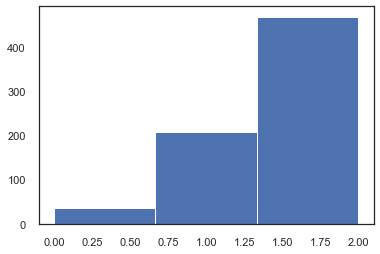

In [167]:
categorical(general, 'Attrition', 'BusinessTravel')

*  Non-Travel: 0
*  Travel_Frequently: 1
*  ***Travel_Rarely***: 2

{'Research Director', 'Healthcare Representative', 'Research Scientist', 'Manager', 'Human Resources', 'Manufacturing Director', 'Sales Representative', 'Laboratory Technician', 'Sales Executive'}
    Attrition                    JobRole
0         0.0  Healthcare Representative
1         1.0         Research Scientist
2         0.0            Sales Executive
3         0.0            Human Resources
4         0.0            Sales Executive
5         0.0          Research Director
6         1.0            Sales Executive
7         0.0            Sales Executive
8         0.0      Laboratory Technician
9         0.0      Laboratory Technician
10        0.0      Laboratory Technician
11        0.0      Laboratory Technician
12        0.0            Sales Executive
13        1.0         Research Scientist
14        0.0     Manufacturing Director
15        0.0  Healthcare Representative
16        0.0      Laboratory Technician
17        0.0            Sales Executive
18        0.0       Sale

(                   count
 Attrition JobRole       
 1.0       0           57
           1           21
           2          126
           3           42
           4           48
           5           57
           6          159
           7          165
           8           36,
 (array([ 57.,  21., 126.,  42.,  48.,  57., 159., 165.,  36.]),
  array([0.        , 0.88888889, 1.77777778, 2.66666667, 3.55555556,
         4.44444444, 5.33333333, 6.22222222, 7.11111111, 8.        ]),
  <a list of 9 Patch objects>))

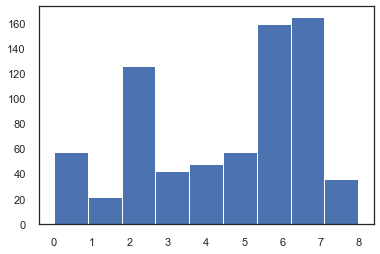

In [168]:
categorical(general, 'Attrition', 'JobRole')

*  Healthcare Representative: 0
*  Human Resources: 1
*  ***Laboratory Technician***: 2
*  Manager: 3
*  Manufacturing Director: 4
*  Research Director: 5
*  ***Research Scientist***: 6
*  ***Sales Executive***: 7
*  Sales Representative: 8

{'Divorced', 'Married', 'Single'}
    Attrition MaritalStatus
0         0.0       Married
1         1.0        Single
2         0.0       Married
3         0.0       Married
4         0.0        Single
5         0.0       Married
6         1.0        Single
7         0.0       Married
8         0.0       Married
9         0.0      Divorced
10        0.0       Married
11        0.0       Married
12        0.0        Single
13        1.0       Married
14        0.0       Married
15        0.0       Married
16        0.0        Single
17        0.0      Divorced
18        0.0      Divorced
19        0.0      Divorced
20        0.0      Divorced
21        0.0      Divorced
22        0.0       Married
23        0.0       Married
24        0.0        Single
25        0.0       Married
26        0.0       Married
27        0.0        Single
28        1.0      Divorced
29        0.0      Divorced
30        1.0      Divorced
31        0.0        Single
32        0.0        Single
33        0.0 

(                         count
 Attrition MaritalStatus       
 1.0       0                 99
           1                252
           2                360,
 (array([ 99., 252., 360.]),
  array([0.        , 0.66666667, 1.33333333, 2.        ]),
  <a list of 3 Patch objects>))

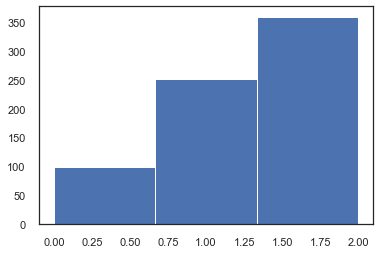

In [169]:
categorical(general, 'Attrition', 'MaritalStatus')

*  Divorced: 0
*  Married: 1
*  ***Single***: 2

USE Chi-Squared!!!

# Time In Data

Identify average clock in time for each employee.

In [171]:
time_in = pd.read_csv('in_time.csv', index_col=0)

In [172]:
time_in.head()

,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,NaN,2015-01-15 10:01:24,2015-01-16 10:19:08,NaN,2015-01-20 09:50:34,2015-01-21 09:49:42,2015-01-22 09:47:45,2015-01-23 09:23:44,NaN,2015-01-27 09:50:37,2015-01-28 09:56:13,2015-01-29 09:53:47,2015-01-30 10:09:26,2015-02-02 09:38:43,2015-02-03 10:23:38,2015-02-04 09:48:37,2015-02-05 09:52:36,2015-02-06 09:53:23,2015-02-09 10:01:45,2015-02-10 10:14:18,2015-02-11 10:18:44,2015-02-12 10:10:35,2015-02-13 09:13:07,2015-02-16 10:14:02,2015-02-17 10:03:08,2015-02-18 10:23:06,NaN,2015-02-20 09:54:56,2015-02-23 09:46:59,2015-02-24 10:11:18,2015-02-25 09:52:36,2015-02-26 09:56:33,2015-02-27 09:58:46,2015-03-02 10:19:43,2015-03-03 10:08:37,2015-03-04 10:05:38,NaN,2015-03-06 09:55:53,2015-03-09 10:28:34,2015-03-10 09:47:30,2015-03-11 09:48:59,2015-03-12 10:10:51,2015-03-13 10:07:18,NaN,2015-03-17 10:05:22,2015-03-18 10:28:21,2015-03-19 10:01:52,2015-03-20 10:37:49,2015-03-23 10:11:19,2015-03-24 10:33:19,2015-03-25 09:41:35,NaN,2015-03-27 09:47:30,2015-03-30 10:

In [ ]:
time_in.

In [175]:
time_in.isnull().sum()

2015-01-01    4410
2015-01-02     209
2015-01-05     206
2015-01-06     228
2015-01-07     209
              ... 
2015-12-25    4410
2015-12-28     234
2015-12-29     230
2015-12-30     265
2015-12-31     213
Length: 261, dtype: int64

# Time Out Data

In [177]:
time_out = pd.read_csv('out_time.csv', index_col=0)

In [178]:
time_out

,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,NaN,2015-01-15 17:22:13,2015-01-16 17:35:11,NaN,2015-01-20 16:37:07,2015-01-21 16:55:24,2015-01-22 16:50:47,2015-01-23 17:00:01,NaN,2015-01-27 17:28:22,2015-01-28 17:03:21,2015-01-29 17:18:36,2015-01-30 17:00:25,2015-02-02 16:32:49,2015-02-03 17:35:49,2015-02-04 17:24:56,2015-02-05 17:26:31,2015-02-06 17:21:35,2015-02-09 17:37:50,2015-02-10 17:30:20,2015-02-11 17:30:19,2015-02-12 17:36:42,2015-02-13 16:25:26,2015-02-16 17:50:23,2015-02-17 17:28:06,2015-02-18 18:13:29,NaN,2015-02-20 17:44:52,2015-02-23 17:13:27,2015-02-24 17:24:48,2015-02-25 17:27:37,2015-02-26 17:08:36,2015-02-27 17:21:55,2015-03-02 17:29:08,2015-03-03 16:54:12,2015-03-04 17:50:18,NaN,2015-03-06 17:44:47,2015-03-09 17:53:05,2015-03-10 16:42:53,2015-03-11 16:58:39,2015-03-12 17:15:39,2015-03-13 17:25:55,NaN,2015-03-17 17:00:16,2015-03-18 17:40:13,2015-03-19 17:52:44,2015-03-20 17:47:34,2015-03-23 17:48:18,2015-03-24 17:48:26,2015-03-25 17:08:19,NaN,2015-03-27 17:20:51,2015-03-30 17:

# Employee Survey Data

In [179]:
emp = pd.read_csv('employee_survey_data.csv')

In [180]:
emp

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0
...,...,...,...,...
4405,4406,4.0,1.0,3.0
4406,4407,4.0,4.0,3.0
4407,4408,1.0,3.0,3.0
4408,4409,4.0,1.0,3.0


# Manager Survey Data

In [182]:
mng = pd.read_csv('manager_survey_data.csv')

In [183]:
mng

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3
...,...,...,...
4405,4406,3,3
4406,4407,2,3
4407,4408,3,4
4408,4409,2,3


In [184]:
survs = pd.merge(emp, mng, on='EmployeeID')

In [185]:
survs

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,3.0,4.0,2.0,3,3
1,2,3.0,2.0,4.0,2,4
2,3,2.0,2.0,1.0,3,3
3,4,4.0,4.0,3.0,2,3
4,5,4.0,1.0,3.0,3,3
...,...,...,...,...,...,...
4405,4406,4.0,1.0,3.0,3,3
4406,4407,4.0,4.0,3.0,2,3
4407,4408,1.0,3.0,3.0,3,4
4408,4409,4.0,1.0,3.0,2,3


In [186]:
survs_test = survs.copy()

In [187]:
survs_test['Attrition'] = general['Attrition']

In [188]:
survs_test

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Attrition
0,1,3.0,4.0,2.0,3,3,0.0
1,2,3.0,2.0,4.0,2,4,1.0
2,3,2.0,2.0,1.0,3,3,0.0
3,4,4.0,4.0,3.0,2,3,0.0
4,5,4.0,1.0,3.0,3,3,0.0
...,...,...,...,...,...,...,...
4405,4406,4.0,1.0,3.0,3,3,0.0
4406,4407,4.0,4.0,3.0,2,3,0.0
4407,4408,1.0,3.0,3.0,3,4,0.0
4408,4409,4.0,1.0,3.0,2,3,0.0


In [191]:
survs_test.groupby(['Attrition']).mean()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
Attrition,,,,,,
0.0,2208.139497,2.772493,2.777989,2.780900,2.734793,3.150041
1.0,2191.767932,2.468839,2.470423,2.660537,2.704641,3.172996


In [193]:
survs_test.columns

Index(['EmployeeID', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating', 'Attrition'],
      dtype='object')

In [ ]:
survs_

In [194]:
features = ['EmployeeID', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating']
y = survs_test['Attrition']
X = survs_test[features]

In [196]:
import statsmodels.api as sm
X = sm.add_constant(X)

In [197]:
logit_model = sm.Logit(y, X.astype(float))

# Get results of the fit
result = logit_model.fit()

MissingDataError: exog contains inf or nans

In [16]:
general.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeID', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [14]:
import re
import pandas as pd
general = pd.read_csv('data/general_data.csv')

In [15]:
def add_underscores(text):
    search = "([A-Z][a-z]+)"
    if re.search(search, text):
        words = re.findall(search, text)
        fixed_string = "_".join(words)
    else:
        fixed_string = text
    return fixed_string.lower()
general.columns = general.columns.map(add_underscores)
general.columns

Index(['age', 'attrition', 'business_travel', 'department',
       'distance_from_home', 'education', 'education_field', 'employee_count',
       'employee', 'gender', 'job_level', 'job_role', 'marital_status',
       'monthly_income', 'num_companies_worked', 'over', 'percent_salary_hike',
       'standard_hours', 'stock_option_level', 'total_working_years',
       'training_times_last_year', 'years_at_company',
       'years_since_last_promotion', 'years_with_curr_manager'],
      dtype='object')

In [23]:
general["job_role"].unique().tolist()

['Healthcare Representative',
 'Research Scientist',
 'Sales Executive',
 'Human Resources',
 'Research Director',
 'Laboratory Technician',
 'Manufacturing Director',
 'Sales Representative',
 'Manager']

In [24]:
import requests

In [30]:
url = 'https://www.glassdoor.com/Salaries/st-louis-healthcare-representative-salary-SRCH_IL.0,8_IM823_KO9,34.htm'
header = {'User-Agent': 'Mozilla/5.0'}
html_page = requests.get(url, headers=header)
html_page

<Response [200]>

In [31]:
html_page.content

b'<!DOCTYPE html>\n<html lang=\'en\' xmlns:fb=\'http://www.facebook.com/2008/fbml\' xmlns:og=\'http://opengraph.org/schema/\'\n      class=\'flex\'>\n\n<head prefix=\'og: http://ogp.me/ns# fb: http://ogp.me/ns/fb# glassdoor: http://ogp.me/ns/fb/glassdoor#\'>\n<title>Salary: Healthcare Representative in St. Louis, MO | Glassdoor</title>\n<meta property="og:title" content="Salary: Healthcare Representative in St. Louis, MO | Glassdoor"/>\n<meta name="description" content="1 Healthcare Representative Salaries in St. Louis, MO provided anonymously by employees. What salary does a Healthcare Representative earn in St. Louis?"/><meta property="og:description" content="1 Healthcare Representative Salaries in St. Louis, MO provided anonymously by employees. What salary does a Healthcare Representative earn in St. Louis?"/>\n<link rel="canonical" href="https://www.glassdoor.com/Salaries/st-louis-healthcare-representative-salary-SRCH_IL.0,8_IM823_KO9,34.htm"/>\n<!-- because the getter clears the

In [93]:
import re
import os
import time
import random
import requests
import numpy as np
import pandas as pd
from os import system   
from math import floor
from copy import deepcopy
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

from config import *

In [94]:
driver = webdriver.Firefox()

In [95]:
def _wait_cycle(wait_min, wait_max):
    """Randomly chooses a wait time based on the min and max values and waits for that duration."""

    wait_time = np.random.uniform(wait_min, wait_max)
    time.sleep(wait_time)
url = 'https://www.glassdoor.com/index.htm'

def load_wait(driver, wait):
    wait = WebDriverWait(driver, wait)
    try:
        page_loaded = wait.until(lambda driver: driver.current_url == url)
        print('The page loaded correctly')
    except TimeoutException:
        print("Loading timeout expired")


In [96]:
def glassdoor_login(driver, url):
    driver.get(url)
    _wait_cycle(0,2)
    load_wait(driver, 2)

    loginbutton = driver.find_element_by_css_selector('#TopNav .locked-home-sign-in .sign-in')
    loginbutton.click()
    load_wait(driver, 2)
    user = driver.find_element_by_css_selector("#LoginModal #userEmail")
    pw = driver.find_element_by_css_selector("#LoginModal #userPassword")

    submit = driver.find_element_by_css_selector("#LoginModal .gd-ui-button.minWidthBtn.css-1sdotxz")

    user.send_keys(glassdoor_username)
    pw.send_keys(glassdoor_pass)

    submit.click()
#     url = "https://www.glassdoor.com/member/home/index.htm"
#     driver.get(url)
#     load_wait(driver, 2)

In [97]:
glassdoor_login(driver, url)

The page loaded correctly
The page loaded correctly


In [104]:
url="https://www.glassdoor.com/member/home/index.htm"
driver.get(url)
_wait_cycle(0,2)
load_wait(driver, 2)
title = "Research Scientist"
location = "Saint Louis, MO (US)"
title_search = driver.find_element_by_css_selector("#SiteSrchTop #sc\.keyword")
place_search = driver.find_element_by_css_selector("#SiteSrchTop #sc\.location")
searcb_button = driver.find_element_by_css_selector("#HeroSearchButton")
type_search = driver.find_element_by_css_selector("#SiteSrchTop .context-choice-list")
type_search.click()
salary_option = driver.find_element_by_css_selector("#SiteSrchTop .salaries")
salary_option.click()

title_search.send_keys(title)
place_search.send_keys(location)
searcb_button.click()


The page loaded correctly


ElementNotInteractableException: Message: Element <ul class="context-choice-list"> could not be scrolled into view


In [105]:
url="https://www.glassdoor.com/member/home/index.htm"
driver.get(url)
_wait_cycle(0,2)
load_wait(driver, 2)

try:
    tooltip = driver.find_element_by_css_selector("#HeaderTooltip")
except:
    "No popup tooltip"
else:
    x = tooltip.find_element_by_css_selector(".SVGInline")
    x.click()

The page loaded correctly


ElementNotInteractableException: Message: Element <span class="SVGInline"> could not be scrolled into view


In [52]:
dir(driver)

['CONTEXT_CHROME',
 'CONTEXT_CONTENT',
 'NATIVE_EVENTS_ALLOWED',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_file_detector',
 '_is_remote',
 '_mobile',
 '_switch_to',
 '_unwrap_value',
 '_web_element_cls',
 '_wrap_value',
 'add_cookie',
 'application_cache',
 'back',
 'binary',
 'capabilities',
 'close',
 'command_executor',
 'context',
 'create_web_element',
 'current_url',
 'current_window_handle',
 'delete_all_cookies',
 'delete_cookie',
 'desired_capabilities',
 'error_handler',
 'execute',
 'execute_async_script',
 'execute_script',
 'file_detector',
 'file_detector_context',
 'find_element',
 'find_element_by_class_name',
 'find_e